In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Sample Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 24 + 3 * X + np.random.randn(1000, 1)  # y = 4 + 3x + noise




ValueError: operands could not be broadcast together with shapes (100,1) (1000,1) 

## Gradient Descent for Linear Regression

### Model Definition
The linear regression model is defined as:

$$
\hat{y} = w \cdot X + b
$$

where:
- \(\hat{y}\) is the predicted value.
- \(w\) is the weight (slope).
- \(X\) is the input feature.
- \(b\) is the bias (intercept).

### Loss Function
We use the Mean Squared Error (MSE) as the loss function, which measures the average squared difference between the predicted values \(\hat{y}\) and the actual values \(y\):

$$
\text{Loss}(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
$$

where:
- \(m\) is the number of samples.
- \(y^{(i)}\) is the actual value for the \(i^{th}\) sample.
- \(\hat{y}^{(i)}\) is the predicted value for the \(i^{th}\) sample.

### Gradient Computation
To minimize the loss function, we use gradient descent. This involves computing the gradients of the loss function with respect to the model parameters \(w\) and \(b\), and then updating these parameters in the direction that reduces the loss.

1. **Gradient with respect to the weight \(w\):**

$$
\frac{\partial \text{Loss}}{\partial w} = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)}) \cdot X^{(i)}
$$

2. **Gradient with respect to the bias \(b\):**

$$
\frac{\partial \text{Loss}}{\partial b} = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})
$$

### Explanation of the Gradient Computation

- **Gradient with respect to \(w\):** This gradient measures how much the loss function changes as we change the weight \(w\). It is calculated as the negative mean of the product of the error \((y^{(i)} - \hat{y}^{(i)})\) and the input feature \(X^{(i)}\). This tells us in which direction to adjust \(w\) to decrease the loss.
  
- **Gradient with respect to \(b\):** This gradient measures how much the loss function changes as we change the bias \(b\). It is calculated as the negative mean of the errors \((y^{(i)} - \hat{y}^{(i)})\). It tells us in which direction to adjust \(b\) to decrease the loss.

### Gradient Descent Update Rule
Using the computed gradients, we update the parameters \(w\) and \(b\) iteratively as follows:

$$
w = w - \alpha \cdot \frac{\partial \text{Loss}}{\partial w}
$$

$$
b = b - \alpha \cdot \frac{\partial \text{Loss}}{\partial b}
$$

where \(\alpha\) is the learning rate, which controls the step size during the optimization process.

### Summary
- The gradients are calculated based on the derivative of the loss function with respect to each parameter.
- Parameters are updated iteratively using the gradient descent update rule.
- This process continues until convergence, where the loss function reaches a minimum value.


Epoch 0: Loss = 22.15142201639294
Epoch 50: Loss = 0.8217823578353877
Epoch 100: Loss = 0.8070654956758387
Epoch 150: Loss = 0.8065997829725563
Epoch 200: Loss = 0.8065850455700009
Epoch 250: Loss = 0.8065845792073
Epoch 300: Loss = 0.8065845644493286
Epoch 350: Loss = 0.8065845639823148
Epoch 400: Loss = 0.8065845639675362
Epoch 450: Loss = 0.8065845639670686
Epoch 500: Loss = 0.8065845639670539
Epoch 550: Loss = 0.8065845639670534
Epoch 600: Loss = 0.8065845639670534
Epoch 650: Loss = 0.8065845639670534
Epoch 700: Loss = 0.8065845639670534
Epoch 750: Loss = 0.8065845639670534
Epoch 800: Loss = 0.8065845639670534
Epoch 850: Loss = 0.8065845639670531
Epoch 900: Loss = 0.8065845639670534
Epoch 950: Loss = 0.806584563967053


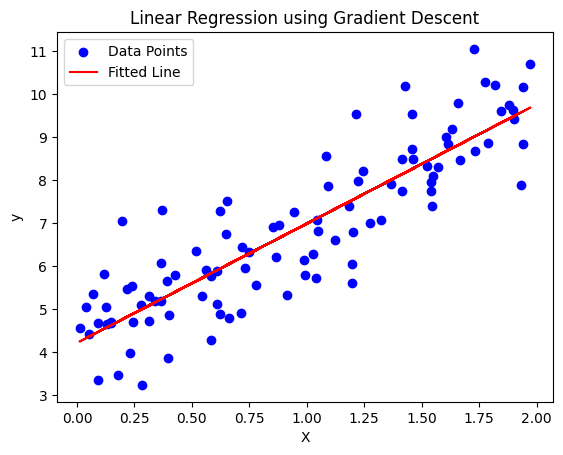

Trained Weight (w): 2.7701133864384917
Trained Bias (b): 4.215096157546739
Final Loss: 0.806584563967053


In [7]:
# 2. Define Linear Model
def predict(X, w, b):
    return X.dot(w) + b

# 3. Calculate Loss (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 4. Gradient Descent
def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = len(y)  # number of samples
    loss_history = []
    
    for epoch in range(epochs):
        # Calculate predictions
        y_pred = predict(X, w, b)
        
        # Compute gradients
        dw = -(2/m) * X.T.dot(y - y_pred)  # Shape (1, 1)
        db = -(2/m) * np.sum(y - y_pred)   # Shape (1,)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Calculate loss for this epoch
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Print loss every 50 epochs
        if epoch % 50 == 0:
            print(f'Epoch {epoch}: Loss = {loss}')
    
    return w, b, loss_history

# Initialize parameters
w_initial = np.random.randn(1, 1)  # Updated shape to (1, 1)
b_initial = np.random.randn(1)     # Shape (1,)
learning_rate = 0.1
epochs = 1000

# 5. Train the model
w_trained, b_trained, loss_history = gradient_descent(X, y, w_initial, b_initial, learning_rate, epochs)

# Predictions after training
y_pred_trained = predict(X, w_trained, b_trained)

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_trained, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

# Display final parameters and loss
print(f'Trained Weight (w): {w_trained[0][0]}')  # Accessing the value from shape (1, 1)
print(f'Trained Bias (b): {b_trained[0]}')
print(f'Final Loss: {loss_history[-1]}')